For the initial part, which includes loading the data and performing basic exploratory data analysis. 

In [3]:
# Loading necessary libraries
library(readr)

# Load the dataset
data <- read_csv("HealthCareAustralia.csv")

spec(data)

Rows: 5190 Columns: 20
-- Column specification --------------------------------------------------------
Delimiter: ","
dbl (20): sex, age, agesq, income, levyplus, freepoor, freepera, illness, ac...

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.


cols(
  sex = col_double(),
  age = col_double(),
  agesq = col_double(),
  income = col_double(),
  levyplus = col_double(),
  freepoor = col_double(),
  freepera = col_double(),
  illness = col_double(),
  actdays = col_double(),
  hscore = col_double(),
  chcond1 = col_double(),
  chcond2 = col_double(),
  doctorco = col_double(),
  nondocco = col_double(),
  hospadmi = col_double(),
  hospdays = col_double(),
  medicine = col_double(),
  prescrib = col_double(),
  nonpresc = col_double(),
  constant = col_double()
)

In [8]:
# Viewing the first few rows of the dataset
head(data)

sex,age,agesq,income,levyplus,freepoor,freepera,illness,actdays,hscore,chcond1,chcond2,doctorco,nondocco,hospadmi,hospdays,medicine,prescrib,nonpresc,constant
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.19,0.0361,0.55,1,0,0,1,4,1,0,0,1,0,0,0,1,1,0,1
1,0.19,0.0361,0.45,1,0,0,1,2,1,0,0,1,0,0,0,2,1,1,1
0,0.19,0.0361,0.90,0,0,0,3,0,0,0,0,1,0,1,4,2,1,1,1
0,0.19,0.0361,0.15,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1
0,0.19,0.0361,0.45,0,0,0,2,5,1,1,0,1,0,0,0,3,1,2,1
1,0.19,0.0361,0.35,0,0,0,5,1,9,1,0,1,0,0,0,1,1,0,1


After loading the data, we can see that the data is already clean and ready to be used. The only thing we need to do is to check the distribution of the target variable and the distribution of the features. We can do that with the command summary() and the command hist().

      sex              age             agesq            income      
 Min.   :0.0000   Min.   :0.1900   Min.   :0.0361   Min.   :0.0000  
 1st Qu.:0.0000   1st Qu.:0.2200   1st Qu.:0.0484   1st Qu.:0.2500  
 Median :1.0000   Median :0.3200   Median :0.1024   Median :0.5500  
 Mean   :0.5206   Mean   :0.4064   Mean   :0.2071   Mean   :0.5832  
 3rd Qu.:1.0000   3rd Qu.:0.6200   3rd Qu.:0.3844   3rd Qu.:0.9000  
 Max.   :1.0000   Max.   :0.7200   Max.   :0.5184   Max.   :1.5000  
    levyplus         freepoor          freepera         illness     
 Min.   :0.0000   Min.   :0.00000   Min.   :0.0000   Min.   :0.000  
 1st Qu.:0.0000   1st Qu.:0.00000   1st Qu.:0.0000   1st Qu.:0.000  
 Median :0.0000   Median :0.00000   Median :0.0000   Median :1.000  
 Mean   :0.4428   Mean   :0.04277   Mean   :0.2102   Mean   :1.432  
 3rd Qu.:1.0000   3rd Qu.:0.00000   3rd Qu.:0.0000   3rd Qu.:2.000  
 Max.   :1.0000   Max.   :1.00000   Max.   :1.0000   Max.   :5.000  
    actdays            hscore     

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.0000  0.0000  0.3017  0.0000  9.0000 

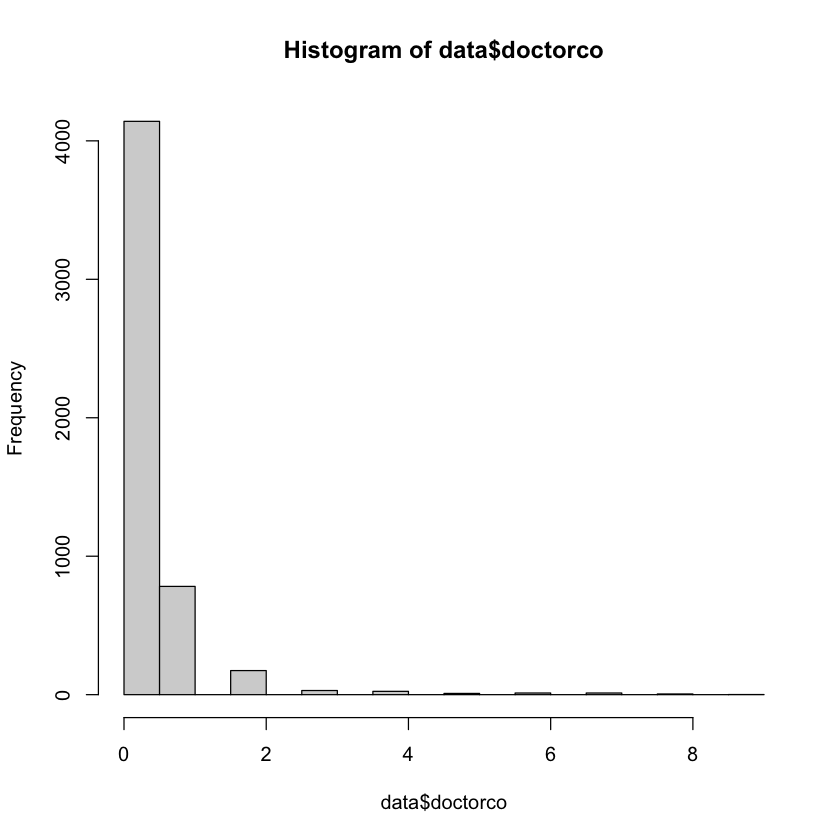

In [9]:
# Summary statistics for the entire dataset
summary(data)

# Specific summary for 'doctorco' column
summary(data$doctorco)

#histogram for 'doctorco' column
hist(data$doctorco)

After that, we can check the distribution of the features. We can see that the majority of the features are binary. This means that the majority of the features are either 0 or 1. This is good because it means that we don't have to do any encoding. We can just use the data as it is.

More redeable plot using ggplot2 package.


   0    1    2    3    4    5    6    7    8    9 
4141  782  174   30   24    9   12   12    5    1 

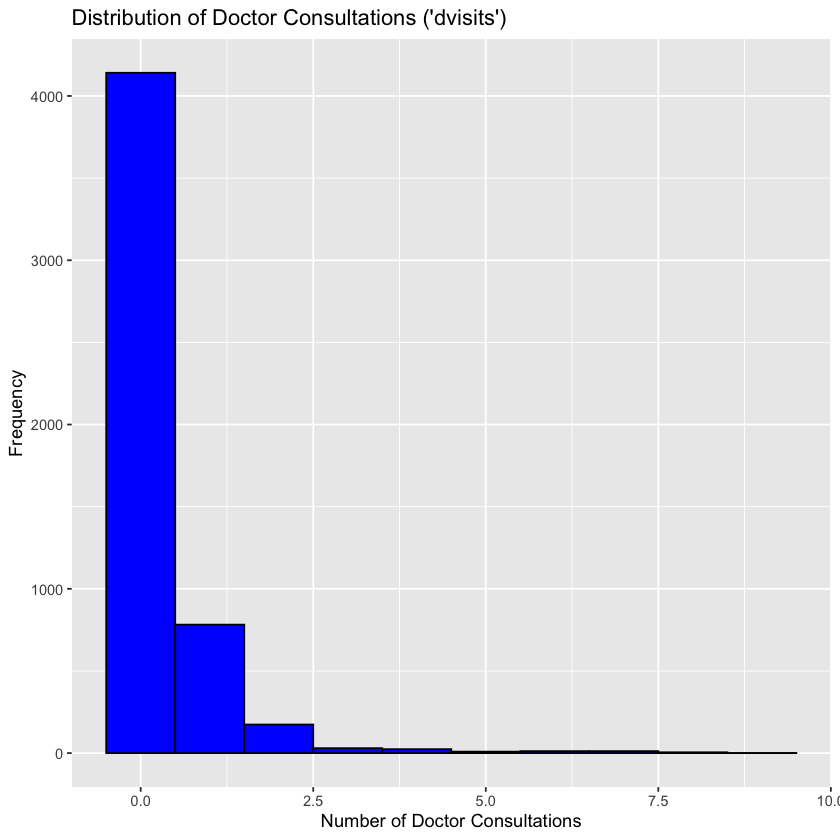

In [10]:
# Checking the distribution of 'dvisits'
table(data$doctorco)

# Visualizing the distribution of 'dvisits'
library(ggplot2)
ggplot(data, aes(x = doctorco)) + 
  geom_histogram(binwidth = 1, fill="blue", color="black") +
  labs(title="Distribution of Doctor Consultations ('dvisits')", 
       x="Number of Doctor Consultations", 
       y="Frequency")


The 'doctorco' is the response variable. The response variable is the variable that we are trying to predict. In this case, we are trying to predict the number of consultations with a doctor or specialist in the past 2 weeks. So, from the distribution of Doctor Consultation, we can see that the data is right-skewed. This means that the majority of the data is concentrated on the left side of the histogram and there are a few data points on the right side. The major data in concentrated in 0. This means that the majority of the people in the dataset have not consulted a doctor in the past 2 weeks. 

Since "doctorco" is a count variable, we should consider models suitable for count data. We can start with a Poisson regression model and then consider other models like Negative Binomial or Zero-Inflated models based on the initial analysis. 

In [7]:
#install.packages("glm2")

In [8]:
# print all the variables in the dataset
variables <- names(data)

# print in a more readable format
print(variables)

 [1] "sex"      "age"      "agesq"    "income"   "levyplus" "freepoor"
 [7] "freepera" "illness"  "actdays"  "hscore"   "chcond1"  "chcond2" 
[13] "doctorco" "nondocco" "hospadmi" "hospdays" "medicine" "prescrib"
[19] "nonpresc" "constant"


After loading the glm2 package, we can use the command glm() to fit a Poisson regression model to the data. We can use the command summary() to see the results of the model. After, we can see also the deviance of the model and the dispersion parameter. The deviance is a measure of how well the model fits the data. The dispersion parameter is a measure of how much the data varies around the mean.



In [11]:
# Load the necessary library
library(glm2)

# Fit a Poisson regression model with all the variables

poisson_model <- glm(doctorco ~ ., 
                     data = data, family = "poisson")

# Summary of the Poisson model
summary(poisson_model)





Caricamento pacchetto: 'glm2'


Il seguente oggetto `e mascherato da 'package:MASS':

    crabs





Call:
glm(formula = doctorco ~ ., family = "poisson", data = data)

Coefficients: (2 not defined because of singularities)
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -2.0712481  0.1916361 -10.808  < 2e-16 ***
sex          0.1220019  0.0567376   2.150   0.0315 *  
age          0.8610110  1.0148679   0.848   0.3962    
agesq       -1.0573127  1.0922103  -0.968   0.3330    
income      -0.1293371  0.0897049  -1.442   0.1494    
levyplus     0.0518785  0.0724925   0.716   0.4742    
freepoor    -0.4308674  0.1801160  -2.392   0.0167 *  
freepera     0.0233116  0.0930682   0.250   0.8022    
illness      0.1342835  0.0199779   6.722 1.80e-11 ***
actdays      0.1108244  0.0054581  20.305  < 2e-16 ***
hscore       0.0172580  0.0102916   1.677   0.0936 .  
chcond1      0.0760496  0.0681592   1.116   0.2645    
chcond2     -0.0249613  0.0868275  -0.287   0.7737    
nondocco     0.0224942  0.0152626   1.474   0.1405    
hospadmi     0.1543128  0.0314185   4.912 9.04e-07 

We can consider the deviance and df.residual to check the goodness of fit of the model. The deviance is a measure of how well the model fits the data. The df.residual is the degrees of freedom of the residuals. The deviance divided by the df.residual gives us the mean deviance. The mean deviance is a measure of how well the model fits the data. The lower the mean deviance, the better the model fits the data.

In a Poisson regression model, the dispersion parameter is ideally 1, because the variance equals the mean in a Poisson distribution. However, in practice, this is often not the case, and the observed variance can be greater than the mean. This is known as overdispersion. The dispersion parameter is a measure of this overdispersion.

The dispersion parameter is calculated as the deviance divided by the degrees of freedom of the residuals (poisson_model$deviance/poisson_model$df.residual). This gives the average amount of deviance per degree of freedom, which can be interpreted as the average amount of variance that is not explained by the model.

On the other hand, the mean deviance is a measure of the goodness of fit of a statistical model. In the context of Poisson regression, it is calculated as the total deviance divided by the number of observations. A lower mean deviance indicates a better fit of the model to the data.

The mean deviance is calculated as the deviance divided by the number of observations (poisson_model$deviance/nrow(data)). This gives the average amount of deviance per observation, which can be interpreted as the average amount of variance that is not explained by the model.

In [10]:
# Diagnostics for the Poisson model (e.g., checking for overdispersion)
# Overdispersion can be roughly checked by comparing residual deviance to degrees of freedom
print(poisson_model$deviance)
print(poisson_model$df.residual)

# Overdispersion parameter
dispersion_parameter <- poisson_model$deviance/poisson_model$df.residual
print(dispersion_parameter)

#mean deviance
mean_deviance <- poisson_model$deviance/nrow(data)
print(mean_deviance)

# Checking for overdispersion
if (dispersion_parameter > 1) {
  print("The model is overdispersed")
} else {
  print("The model is NOT overdispersed")
}


[1] 4244.351
[1] 5172
[1] 0.8206402
[1] 0.8177941
[1] "The model is NOT overdispersed"


So, the residual deviance is 4244.351, with residual degree of freedom of 5172. The dispersion parameter is 0.82 and the mean deviance is 0.82. This means that the model is a good fit for the data. The residual deviance is the deviance of the model after fitting the data. The residual degree of freedom is the degrees of freedom of the residuals. 

If dispersion parameter is close to 1, the model is a good fit for the data. If the dispersion parameter is greater than 1, the model is overdispersed. If the dispersion parameter is less than 1, the model is underdispersed. In this case, the dispersion parameter is 0.82, so the model is not overdispersed. 



In [11]:
# #Install the necessary library
# install.packages("pscl") #this package is used to fit a negative binomial model
# install.packages("broom") #this package is used to tidy the model output
# install.packages("tidyverse") #this package is used to tidy the model output

#other packages for negative binomial model


In [12]:
# Check for NA values
if(any(is.na(data))) {
  print("Data contains NA values")
  # handle NA values
} else {
  print("Data does not contain NA values")
}


[1] "Data does not contain NA values"


Underdispersion in Poisson models is less common than overdispersion and can sometimes be due to data peculiarities or specific constraints in the data collection process. Nevertheless, it's generally a less severe issue compared to overdispersion.

Given these results, you might still consider exploring a Negative Binomial regression, particularly to confirm if the Poisson model is indeed the best fit or if the Negative Binomial model could provide a better fit due to any unaccounted overdispersion. Additionally, examining the residuals of the Poisson model for any patterns or deviations from randomness could provide further insights into the model's adequacy.

The mean deviance is 0.8206 

In [12]:
#find the best variables
library(MASS)
stepAIC(poisson_model, direction="both")

Start:  AIC=6611.92
doctorco ~ sex + age + agesq + income + levyplus + freepoor + 
    freepera + illness + actdays + hscore + chcond1 + chcond2 + 
    nondocco + hospadmi + hospdays + medicine + prescrib + nonpresc + 
    constant




Step:  AIC=6611.92
doctorco ~ sex + age + agesq + income + levyplus + freepoor + 
    freepera + illness + actdays + hscore + chcond1 + chcond2 + 
    nondocco + hospadmi + hospdays + medicine + prescrib + nonpresc


Step:  AIC=6611.92
doctorco ~ sex + age + agesq + income + levyplus + freepoor + 
    freepera + illness + actdays + hscore + chcond1 + chcond2 + 
    nondocco + hospadmi + hospdays + medicine + prescrib

           Df Deviance    AIC
- hospdays  1   4244.4 6610.0
- freepera  1   4244.4 6610.0
- chcond2   1   4244.4 6610.0
- levyplus  1   4244.9 6610.4
- age       1   4245.1 6610.6
- agesq     1   4245.3 6610.9
- chcond1   1   4245.6 6611.2
<none>          4244.4 6611.9
- income    1   4246.4 6612.0
- nondocco  1   4246.4 6612.0
- hscore    1   4247.1 6612.7
- sex       1   4249.0 6614.6
- medicine  1   4250.5 6616.1
- freepoor  1   4250.7 6616.3
- hospadmi  1   4266.8 6632.3
- prescrib  1   4283.7 6649.3
- illness   1   4288.9 6654.4
- actdays   1   4604.4 6969.9

Step: 


Call:  glm(formula = doctorco ~ sex + freepoor + illness + actdays + 
    hscore + chcond1 + nondocco + hospadmi + medicine + prescrib, 
    family = "poisson", data = data)

Coefficients:
(Intercept)          sex     freepoor      illness      actdays       hscore  
   -2.00115      0.13673     -0.41430      0.13348      0.11023      0.01833  
    chcond1     nondocco     hospadmi     medicine     prescrib  
    0.08181      0.02340      0.15973     -0.08845      0.22538  

Degrees of Freedom: 5189 Total (i.e. Null);  5179 Residual
Null Deviance:	    5635 
Residual Deviance: 4247 	AIC: 6601

"sex","age","agesq","income","levyplus","freepoor","freepera","illness","actdays","hscore","chcond1","chcond2","doctorco","nondocco","hospadmi","hospdays","medicine","prescrib","nonpresc","constant"

In [14]:
poisson_model_best_par <- glm(doctorco ~ sex + freepoor + illness + actdays + 
    hscore + chcond1 + nondocco + hospadmi + medicine + prescrib, 
    family = "poisson", data = data)

summary(poisson_model_best_par)

# Diagnostics for the Poisson model (e.g., checking for overdispersion)
# Overdispersion can be roughly checked by comparing residual deviance to degrees of freedom
print(poisson_model_best_par$deviance)
print(poisson_model_best_par$df.residual)

# Overdispersion parameter
dispersion_parameter <- poisson_model_best_par$deviance/poisson_model_best_par$df.residual
print(dispersion_parameter)

#mean deviance
mean_deviance <- poisson_model_best_par$deviance/nrow(data)
print(mean_deviance)

# Checking for overdispersion
if (dispersion_parameter > 1) {
  print("The model is overdispersed")
} else {
  print("The model is NOT overdispersed")
}


Call:
glm(formula = doctorco ~ sex + freepoor + illness + actdays + 
    hscore + chcond1 + nondocco + hospadmi + medicine + prescrib, 
    family = "poisson", data = data)

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -2.001155   0.055232 -36.232  < 2e-16 ***
sex          0.136728   0.054480   2.510   0.0121 *  
freepoor    -0.414298   0.172013  -2.409   0.0160 *  
illness      0.133480   0.019656   6.791 1.11e-11 ***
actdays      0.110231   0.005376  20.506  < 2e-16 ***
hscore       0.018328   0.010199   1.797   0.0723 .  
chcond1      0.081807   0.053329   1.534   0.1250    
nondocco     0.023399   0.015046   1.555   0.1199    
hospadmi     0.159728   0.029373   5.438 5.39e-08 ***
medicine    -0.088453   0.037199  -2.378   0.0174 *  
prescrib     0.225385   0.037556   6.001 1.96e-09 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 5634.8  on 5189  de

[1] 4247.427
[1] 5179
[1] 0.8201249
[1] 0.8183867
[1] "The model is NOT overdispersed"


Continuing with the analysis, after exploring the Poisson regression model, it's advisable to consider a Negative Binomial regression. In this specific and rare case, which the model is not overdispersed, but underdispersed, the Negative Binomial model might not be necessary. However, it's still a good practice to explore alternative models to confirm the adequacy of the Poisson model.

In [15]:
# Negative Binomial Regression (using MASS package) with all the variables

#negbin_model <- glm.nb(doctorco ~ ., data = data)
negbin_model <- glm.nb(formula = doctorco ~ ., data = data)

# Summary of the Negative Binomial model
summary(negbin_model)


Call:
glm.nb(formula = doctorco ~ ., data = data, init.theta = 1.037148507, 
    link = log)

Coefficients: (2 not defined because of singularities)
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -2.108e+00  2.328e-01  -9.055  < 2e-16 ***
sex          1.690e-01  7.000e-02   2.415 0.015753 *  
age         -1.322e-02  1.265e+00  -0.010 0.991659    
agesq       -1.103e-01  1.382e+00  -0.080 0.936408    
income      -9.360e-02  1.081e-01  -0.866 0.386487    
levyplus     6.299e-02  8.532e-02   0.738 0.460328    
freepoor    -5.368e-01  2.131e-01  -2.519 0.011759 *  
freepera     9.210e-02  1.155e-01   0.797 0.425372    
illness      1.648e-01  2.492e-02   6.613 3.78e-11 ***
actdays      1.234e-01  7.590e-03  16.253  < 2e-16 ***
hscore       2.892e-02  1.364e-02   2.121 0.033944 *  
chcond1      3.727e-02  8.017e-02   0.465 0.642067    
chcond2     -3.061e-05  1.077e-01   0.000 0.999773    
nondocco     2.196e-02  2.327e-02   0.944 0.345367    
hospadmi     1.909e-01  5

Like before, we can use stepAIC() to perform stepwise model selection and identify the best model based on the AIC criterion. We can then compare the AIC of the Poisson model with the AIC of the Negative Binomial model to determine which model is the best fit for the data.

Just for testing, we can firstly check the best parameters found for poisson regression model and then we can check the best parameters found for negative binomial regression model.

In [16]:
# Negative Binomial Regression with the best variables found with poisson regression

negbin_model_testing_1 <- glm.nb(formula = doctorco ~ sex + freepoor + illness + actdays + 
    hscore + chcond1 + nondocco + hospadmi + medicine + prescrib, 
    data = data)

# Summary of the Negative Binomial model
summary(negbin_model_testing_1)


Call:
glm.nb(formula = doctorco ~ sex + freepoor + illness + actdays + 
    hscore + chcond1 + nondocco + hospadmi + medicine + prescrib, 
    data = data, init.theta = 1.040409799, link = log)

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -2.158596   0.065873 -32.769  < 2e-16 ***
sex          0.192188   0.066931   2.871  0.00409 ** 
freepoor    -0.539699   0.203569  -2.651  0.00802 ** 
illness      0.165962   0.024464   6.784 1.17e-11 ***
actdays      0.122779   0.007512  16.344  < 2e-16 ***
hscore       0.029998   0.013486   2.224  0.02612 *  
chcond1      0.037262   0.065778   0.566  0.57107    
nondocco     0.024275   0.023045   1.053  0.29217    
hospadmi     0.199652   0.045979   4.342 1.41e-05 ***
medicine    -0.113338   0.045989  -2.464  0.01372 *  
prescrib     0.283027   0.047125   6.006 1.90e-09 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for Negative Binomial(1.0404) family taken to be 1)


In [17]:
# stepAIC for negative binomial model

stepAIC(negbin_model, direction="both")


Start:  AIC=6344.36
doctorco ~ sex + age + agesq + income + levyplus + freepoor + 
    freepera + illness + actdays + hscore + chcond1 + chcond2 + 
    nondocco + hospadmi + hospdays + medicine + prescrib + nonpresc + 
    constant


Step:  AIC=6344.36
doctorco ~ sex + age + agesq + income + levyplus + freepoor + 
    freepera + illness + actdays + hscore + chcond1 + chcond2 + 
    nondocco + hospadmi + hospdays + medicine + prescrib + nonpresc


Step:  AIC=6344.36
doctorco ~ sex + age + agesq + income + levyplus + freepoor + 
    freepera + illness + actdays + hscore + chcond1 + chcond2 + 
    nondocco + hospadmi + hospdays + medicine + prescrib

           Df    AIC
- chcond2   1 6342.4
- age       1 6342.4
- agesq     1 6342.4
- hospdays  1 6342.4
- chcond1   1 6342.6
- levyplus  1 6342.9
- freepera  1 6343.0
- income    1 6343.1
- nondocco  1 6343.2
<none>        6344.4
- hscore    1 6346.7
- sex       1 6348.2
- medicine  1 6348.3
- freepoor  1 6349.7
- hospadmi  1 6353.9
- prescr


Call:  glm.nb(formula = doctorco ~ sex + freepoor + illness + actdays + 
    hscore + hospadmi + medicine + prescrib, data = data, init.theta = 1.036677804, 
    link = log)

Coefficients:
(Intercept)          sex     freepoor      illness      actdays       hscore  
    -2.1476       0.1996      -0.5426       0.1681       0.1241       0.0297  
   hospadmi     medicine     prescrib  
     0.2024      -0.1142       0.2866  

Degrees of Freedom: 5189 Total (i.e. Null);  5181 Residual
Null Deviance:	    4035 
Residual Deviance: 3021 	AIC: 6331

Found the best parameters for negative binomial regression model. The best parameters for the negative binomial regression model are not the same as the best parameters for the Poisson regression model. 

Actually, with the function stepAIC(), the best parameters for the negative binomial regression model are: 
    sex + freepoor + illness + actdays + hscore + hospadmi + medicine + prescrib 

with an AIC of 6331. 




In [18]:
# Negative Binomial Regression Model with best parameters (obtained with stepAIC())

negbin_model_bp <- glm.nb(formula = doctorco ~ sex + freepoor + illness + actdays + 
    hscore + hospadmi + medicine + prescrib, 
    data = data)

# Summary of the Negative Binomial model
summary(negbin_model_bp)


Call:
glm.nb(formula = doctorco ~ sex + freepoor + illness + actdays + 
    hscore + hospadmi + medicine + prescrib, data = data, init.theta = 1.03670749, 
    link = log)

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -2.147554   0.063003 -34.086  < 2e-16 ***
sex          0.199588   0.066482   3.002  0.00268 ** 
freepoor    -0.542598   0.203438  -2.667  0.00765 ** 
illness      0.168111   0.024190   6.950 3.66e-12 ***
actdays      0.124050   0.007377  16.816  < 2e-16 ***
hscore       0.029699   0.013436   2.210  0.02708 *  
hospadmi     0.202383   0.045613   4.437 9.12e-06 ***
medicine    -0.114215   0.046030  -2.481  0.01309 *  
prescrib     0.286582   0.047154   6.078 1.22e-09 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for Negative Binomial(1.0367) family taken to be 1)

    Null deviance: 4034.6  on 5189  degrees of freedom
Residual deviance: 3021.2  on 5181  degrees of freedom
AIC: 6331.5

Number

With the AIC for the best Poisson model being 6601 and the AIC for the best Negative Binomial model being 6331.5, the Negative Binomial model has a significantly lower AIC. This suggests that the Negative Binomial model provides a better fit for the data compared to the Poisson model.

The Akaike Information Criterion (AIC) is a widely used measure of a statistical model's quality. It deals with the trade-off between the goodness of fit of the model and the simplicity of the model. A lower AIC value generally indicates a model that better explains the variability in the data without overfitting.

Since count data often exhibit overdispersion (where the variance exceeds the mean), the Negative Binomial model is typically more flexible in handling this characteristic. The results from analysis suggest that the Negative Binomial model not only accounts for overdispersion effectively but also results in a better overall model fit as evidenced by the lower AIC.

## New analysis:

Now, we go through with a new analysis. In this new part of the project, we'll see:
- Zero-Inflated Poisson (ZIP) 
- Zero-Inflated Negative Binomial (ZINB)
- Hurdle-Poisson
- Hurdle-Negative Binomial


We can start from Zero-Inflated Poisson (ZIP) model. The Zero-Inflated Poisson (ZIP) model is a mixture model that assumes that the data is generated by two processes. The first process is a Poisson process that generates the count data. The second process is a Bernoulli process that generates the zero-inflation. The ZIP model is a good choice for count data that has an excessive number of zeros. 

We can use the zeroinfl() function from the pscl package to fit a ZIP model to the data. We can use the command summary() to see the results of the model. After, we can see also the deviance of the model and the dispersion parameter. Then, we can check metrics like Accuracy, AUC, F-1 Score for binary classification and RMSE for regression.

In [19]:
# Required libraries
# install.packages("pROC")

install.packages("Metrics")

Installazione pacchetto in '/Users/andrea.buscema/Library/R/x86_64/4.3/library'
(perch'e 'lib' non `e specificato)




I pacchetti binari scaricati sono in
	/var/folders/1f/b06ndvrs4z3d8ww70y1v2mxc0000gn/T//RtmpovwfAq/downloaded_packages


In [13]:
library(pscl)
library(pROC)
library(Metrics)

# Zero-Inflated Poisson model (ZIP) - Poisson part
model_zip_1_p <- zeroinfl(doctorco ~ age + sex + income + levyplus + freepoor 
+ freepera + illness + actdays + hscore + chcond1 + chcond2 + nondocco + hospadmi 
+ hospdays + prescrib + nonpresc | age + sex + income + levyplus + freepoor + freepera + illness + actdays + hscore + chcond1 + chcond2 
+ nondocco + hospadmi + hospdays + prescrib + nonpresc, data = data, dist = "poisson")


# Model 2
model_zip_2_p <- zeroinfl(doctorco ~ levyplus + freepera + illness + actdays + hscore + chcond1 + chcond2 
+ hospadmi + prescrib + nonpresc | levyplus + freepoor + freepera + illness + actdays + hscore + nondocco 
+ hospdays + prescrib + nonpresc, data = data, dist = "poisson")


# Model 3
model_zip_3_p <- zeroinfl(doctorco ~ income*levyplus + income*freepera + illness*actdays + hscore + chcond1 + age*chcond2 
+ hospadmi  + prescrib + nonpresc | levyplus + freepoor + freepera + illness + actdays + hscore + nondocco + hospdays + prescrib + nonpresc, data = data, dist = "poisson")

# Summary of the ZIP model
summary(model_zip_1_p) # Poisson part
summary(model_zip_2_p) # Poisson part
summary(model_zip_3_p) # Poisson part

# AIC
AIC(model_zip_1_p, model_zip_2_p, model_zip_3_p)




Call:
zeroinfl(formula = doctorco ~ age + sex + income + levyplus + freepoor + 
    freepera + illness + actdays + hscore + chcond1 + chcond2 + nondocco + 
    hospadmi + hospdays + prescrib + nonpresc | age + sex + income + 
    levyplus + freepoor + freepera + illness + actdays + hscore + chcond1 + 
    chcond2 + nondocco + hospadmi + hospdays + prescrib + nonpresc, data = data, 
    dist = "poisson")

Pearson residuals:
    Min      1Q  Median      3Q     Max 
-2.2655 -0.4377 -0.2527 -0.1717 11.3941 

Count model coefficients (poisson with log link):
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -0.355186   0.138103  -2.572  0.01011 *  
age         -0.340477   0.211454  -1.610  0.10736    
sex         -0.064331   0.067620  -0.951  0.34143    
income      -0.175331   0.104677  -1.675  0.09394 .  
levyplus    -0.132438   0.093732  -1.413  0.15767    
freepoor    -0.270693   0.224454  -1.206  0.22782    
freepera    -0.235527   0.111751  -2.108  0.03507 *  
illness


Call:
zeroinfl(formula = doctorco ~ levyplus + freepera + illness + actdays + 
    hscore + chcond1 + chcond2 + hospadmi + prescrib + nonpresc | levyplus + 
    freepoor + freepera + illness + actdays + hscore + nondocco + hospdays + 
    prescrib + nonpresc, data = data, dist = "poisson")

Pearson residuals:
    Min      1Q  Median      3Q     Max 
-2.2869 -0.4338 -0.2528 -0.1766 11.1438 

Count model coefficients (poisson with log link):
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -0.60203    0.09170  -6.565 5.20e-11 ***
levyplus    -0.17430    0.08501  -2.050 0.040323 *  
freepera    -0.28669    0.09112  -3.146 0.001653 ** 
illness      0.03803    0.02369   1.605 0.108393    
actdays      0.07500    0.00567  13.227  < 2e-16 ***
hscore       0.01878    0.01082   1.735 0.082673 .  
chcond1     -0.19025    0.07000  -2.718 0.006571 ** 
chcond2     -0.25730    0.08529  -3.017 0.002555 ** 
hospadmi     0.20306    0.03026   6.711 1.93e-11 ***
prescrib     0.06981    0


Call:
zeroinfl(formula = doctorco ~ income * levyplus + income * freepera + 
    illness * actdays + hscore + chcond1 + age * chcond2 + hospadmi + 
    prescrib + nonpresc | levyplus + freepoor + freepera + illness + 
    actdays + hscore + nondocco + hospdays + prescrib + nonpresc, data = data, 
    dist = "poisson")

Pearson residuals:
    Min      1Q  Median      3Q     Max 
-2.0943 -0.4317 -0.2536 -0.1741 12.4877 

Count model coefficients (poisson with log link):
                 Estimate Std. Error z value Pr(>|z|)    
(Intercept)     -0.385590   0.153026  -2.520  0.01174 *  
income          -0.522958   0.172390  -3.034  0.00242 ** 
levyplus        -0.490642   0.149744  -3.277  0.00105 ** 
freepera        -0.448903   0.174857  -2.567  0.01025 *  
illness          0.061461   0.030480   2.016  0.04376 *  
actdays          0.085201   0.010216   8.340  < 2e-16 ***
hscore           0.019222   0.010847   1.772  0.07637 .  
chcond1         -0.206790   0.073446  -2.816  0.00487 ** 
age 

,df,AIC
,<dbl>,<dbl>
model_zip_1_p,34,6165.884
model_zip_2_p,22,6149.819
model_zip_3_p,28,6143.782


In [21]:
# Zero-Inflated Poisson model (ZIP) - Negative Binomial part
model_zip_1_nb <- zeroinfl(doctorco ~ age + sex + income + levyplus + freepoor 
+ freepera + illness + actdays + hscore + chcond1 + chcond2 + nondocco + hospadmi 
+ hospdays + prescrib + nonpresc | age + sex + income + levyplus + freepoor + freepera + illness + actdays + hscore + chcond1 + chcond2 
+ nondocco + hospadmi + hospdays + prescrib + nonpresc, data = data, dist = "negbin")


# Model 2
model_zip_2_nb <- zeroinfl(doctorco ~ levyplus + freepera + illness + actdays + hscore + chcond1 + chcond2 
+ hospadmi + prescrib + nonpresc | levyplus + freepoor + freepera + illness + actdays + hscore + nondocco 
+ hospdays + prescrib + nonpresc, data = data, dist = "negbin")


# Model 3
model_zip_3_nb <- zeroinfl(doctorco ~ income*levyplus + income*freepera + illness*actdays + hscore + chcond1 + age*chcond2 
+ hospadmi  + prescrib + nonpresc | levyplus + freepoor + freepera + illness + actdays + hscore + nondocco + hospdays + prescrib + nonpresc, data = data, dist = "negbin")

# Summary of the ZIP model
summary(model_zip_1_nb) # Poisson part
summary(model_zip_2_nb) # Poisson part
summary(model_zip_3_nb) # Poisson part

# AIC
AIC(model_zip_1_nb, model_zip_2_nb, model_zip_3_nb)


Call:
zeroinfl(formula = doctorco ~ age + sex + income + levyplus + freepoor + 
    freepera + illness + actdays + hscore + chcond1 + chcond2 + nondocco + 
    hospadmi + hospdays + prescrib + nonpresc | age + sex + income + 
    levyplus + freepoor + freepera + illness + actdays + hscore + chcond1 + 
    chcond2 + nondocco + hospadmi + hospdays + prescrib + nonpresc, data = data, 
    dist = "negbin")

Pearson residuals:
    Min      1Q  Median      3Q     Max 
-1.2915 -0.4371 -0.2468 -0.1612 11.4122 

Count model coefficients (negbin with log link):
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -0.605083   0.160785  -3.763 0.000168 ***
age         -0.264729   0.242640  -1.091 0.275258    
sex         -0.035448   0.077952  -0.455 0.649299    
income      -0.123303   0.117985  -1.045 0.295988    
levyplus    -0.151142   0.107870  -1.401 0.161167    
freepoor    -0.283581   0.259296  -1.094 0.274104    
freepera    -0.205565   0.129182  -1.591 0.111546    
illness  


Call:
zeroinfl(formula = doctorco ~ levyplus + freepera + illness + actdays + 
    hscore + chcond1 + chcond2 + hospadmi + prescrib + nonpresc | levyplus + 
    freepoor + freepera + illness + actdays + hscore + nondocco + hospdays + 
    prescrib + nonpresc, data = data, dist = "negbin")

Pearson residuals:
    Min      1Q  Median      3Q     Max 
-1.2816 -0.4353 -0.2459 -0.1660 11.0928 

Count model coefficients (negbin with log link):
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -0.791594   0.105944  -7.472 7.91e-14 ***
levyplus    -0.181815   0.096824  -1.878 0.060411 .  
freepera    -0.244431   0.104142  -2.347 0.018920 *  
illness      0.053568   0.027241   1.966 0.049246 *  
actdays      0.083401   0.006912  12.066  < 2e-16 ***
hscore       0.021535   0.012874   1.673 0.094364 .  
chcond1     -0.177061   0.077758  -2.277 0.022782 *  
chcond2     -0.200917   0.098111  -2.048 0.040575 *  
hospadmi     0.204256   0.041299   4.946 7.59e-07 ***
prescrib     0.07


Call:
zeroinfl(formula = doctorco ~ income * levyplus + income * freepera + 
    illness * actdays + hscore + chcond1 + age * chcond2 + hospadmi + 
    prescrib + nonpresc | levyplus + freepoor + freepera + illness + 
    actdays + hscore + nondocco + hospdays + prescrib + nonpresc, data = data, 
    dist = "negbin")

Pearson residuals:
    Min      1Q  Median      3Q     Max 
-1.2381 -0.4338 -0.2489 -0.1676 12.3979 

Count model coefficients (negbin with log link):
                 Estimate Std. Error z value Pr(>|z|)    
(Intercept)     -0.672010   0.171005  -3.930 8.50e-05 ***
income          -0.445375   0.190596  -2.337 0.019452 *  
levyplus        -0.458484   0.169605  -2.703 0.006867 ** 
freepera        -0.379027   0.197391  -1.920 0.054835 .  
illness          0.090624   0.032727   2.769 0.005621 ** 
actdays          0.103999   0.012521   8.306  < 2e-16 ***
hscore           0.021567   0.012889   1.673 0.094270 .  
chcond1         -0.197262   0.080763  -2.442 0.014587 *  
age   

,df,AIC
,<dbl>,<dbl>
model_zip_1_nb,35,6073.471
model_zip_2_nb,23,6054.052
model_zip_3_nb,29,6051.707


### Extra from Tanja's R code:

,df,AIC
,<dbl>,<dbl>
initial_model_poisson,34,6165.884
updated_model_poisson,22,6149.819


,df,AIC
,<dbl>,<dbl>
updated_model_NBZ,29,6051.707
initial_model_NBZ,35,6073.471



Call:
zeroinfl(formula = doctorco ~ income * levyplus + income * freepera + 
    illness * actdays + hscore + chcond1 + age * chcond2 + hospadmi + 
    prescrib + nonpresc | levyplus + freepoor + freepera + illness + 
    actdays + hscore + nondocco + hospdays + prescrib + nonpresc, data = data, 
    dist = "negbin")

Pearson residuals:
    Min      1Q  Median      3Q     Max 
-1.2381 -0.4338 -0.2489 -0.1676 12.3979 

Count model coefficients (negbin with log link):
                 Estimate Std. Error z value Pr(>|z|)    
(Intercept)     -0.672010   0.171005  -3.930 8.50e-05 ***
income          -0.445375   0.190596  -2.337 0.019452 *  
levyplus        -0.458484   0.169605  -2.703 0.006867 ** 
freepera        -0.379027   0.197391  -1.920 0.054835 .  
illness          0.090624   0.032727   2.769 0.005621 ** 
actdays          0.103999   0.012521   8.306  < 2e-16 ***
hscore           0.021567   0.012889   1.673 0.094270 .  
chcond1         -0.197262   0.080763  -2.442 0.014587 *  
age   

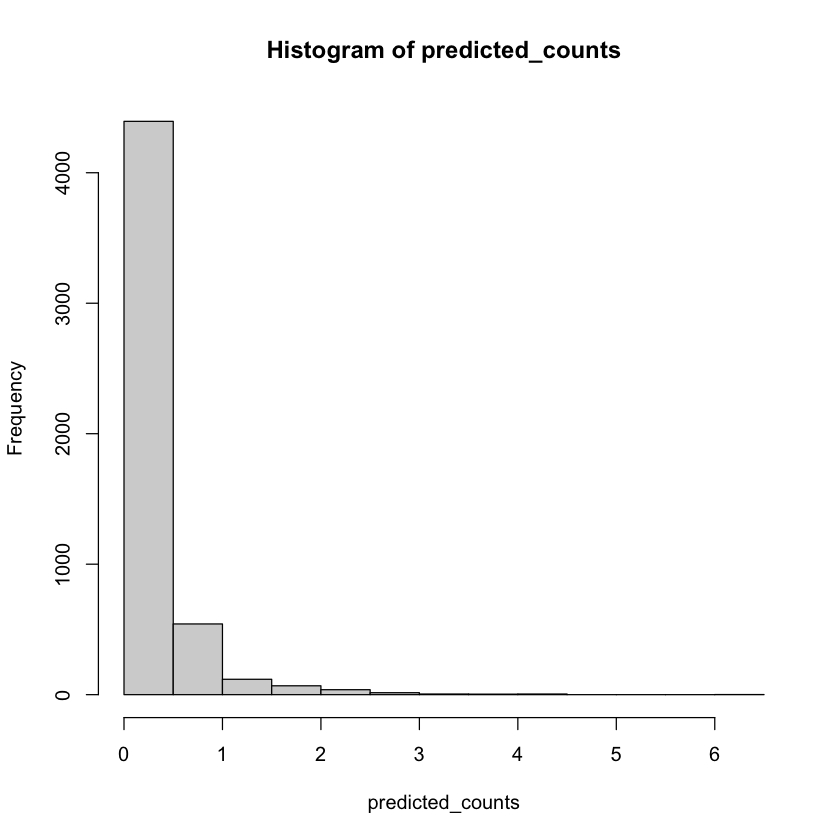

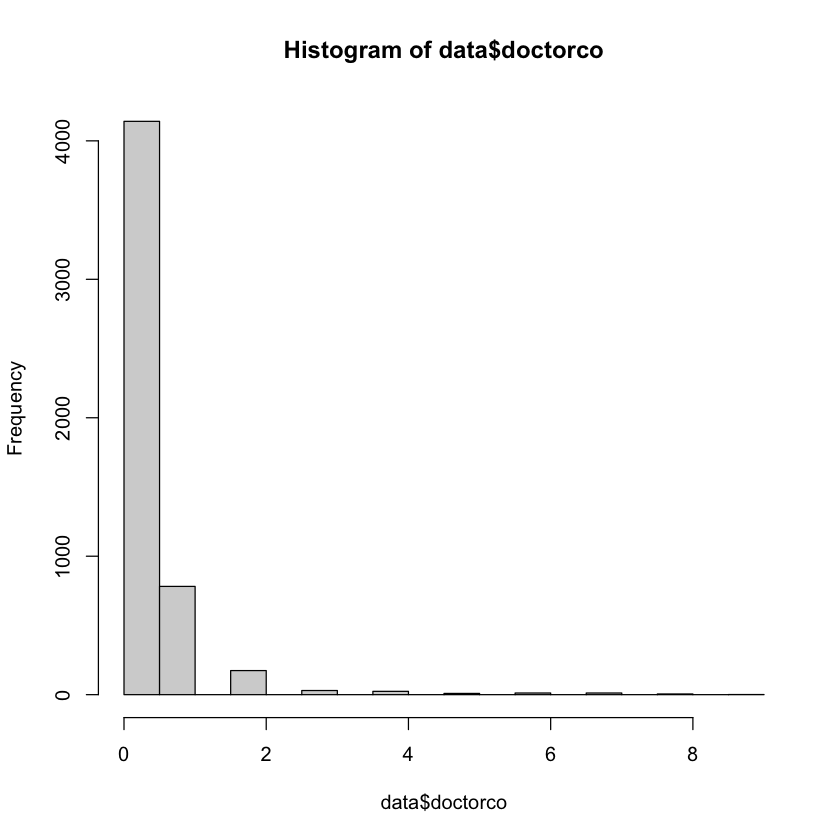

1.5,4312.5,8623.5,12934.5,17245.5,21556.5,25867.5,30178.5,34489.5,38800.5
2.5,4313.5,8624.5,12935.5,17246.5,21557.5,25868.5,30179.5,34490.5,38801.5
3.5,4314.5,8625.5,12936.5,17247.5,21558.5,25869.5,30180.5,34491.5,38802.5
4.5,4315.5,8626.5,12937.5,17248.5,21559.5,25870.5,30181.5,34492.5,38803.5
5.5,4316.5,8627.5,12938.5,17249.5,21560.5,25871.5,30182.5,34493.5,38804.5
6.5,4317.5,8628.5,12939.5,17250.5,21561.5,25872.5,30183.5,34494.5,38805.5
7.5,4318.5,8629.5,12940.5,17251.5,21562.5,25873.5,30184.5,34495.5,38806.5
8.5,4319.5,8630.5,12941.5,17252.5,21563.5,25874.5,30185.5,34496.5,38807.5
9.5,4320.5,8631.5,12942.5,17253.5,21564.5,25875.5,30186.5,34497.5,38808.5
10.5,4321.5,8632.5,12943.5,17254.5,21565.5,25876.5,30187.5,34498.5,38809.5
11.5,4322.5,8633.5,12944.5,17255.5,21566.5,25877.5,30188.5,34499.5,38810.5


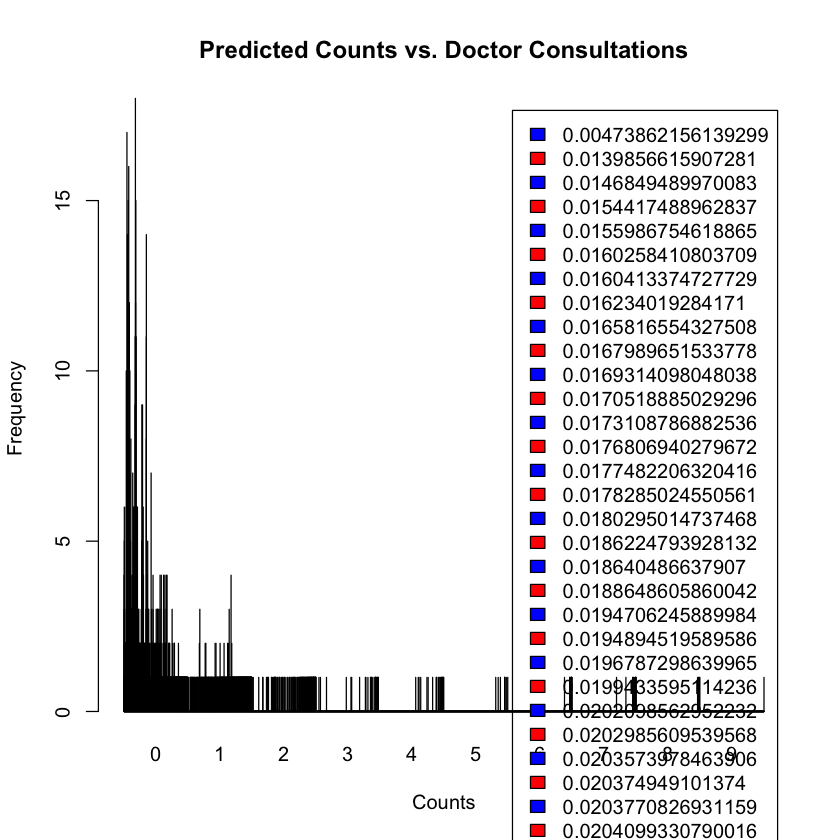

[1] -581.4844


,df,AIC
,<dbl>,<dbl>
updated_model2_NBZ,21,6060.617
initial_model_NBZ,35,6073.471


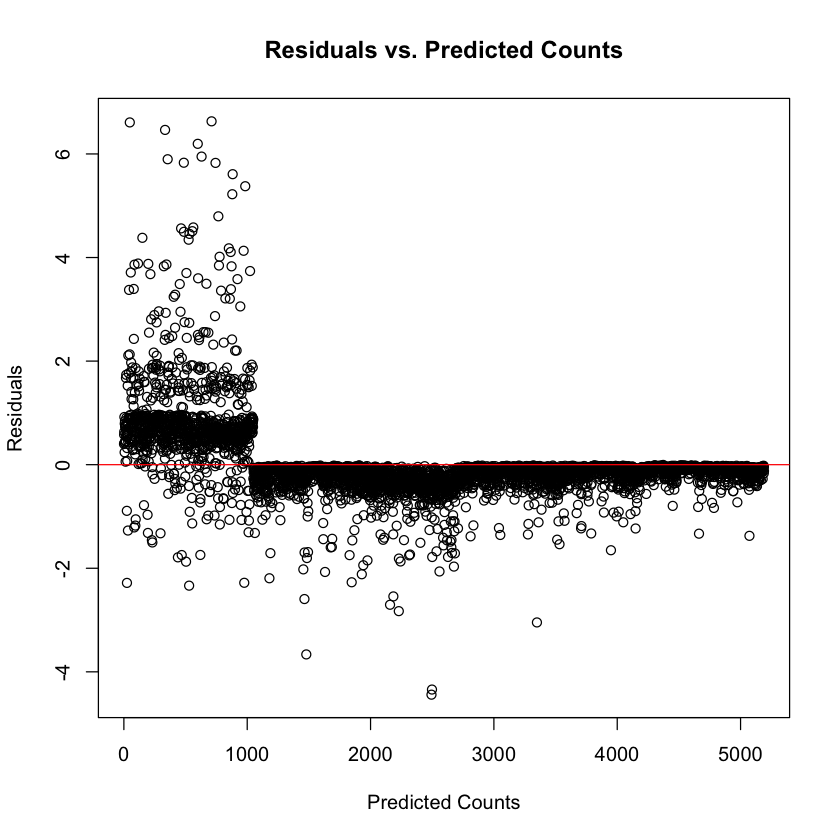

In [36]:
###ZERO INFLATED-POISSON

library(MASS)
library(pscl)

# Fit an initial model (you might start with a full model or a null model)
initial_model_poisson <- zeroinfl(doctorco ~ age + sex + income + levyplus + freepoor + freepera + illness + actdays + hscore + chcond1 + chcond2 + nondocco + hospadmi + hospdays + prescrib + nonpresc | age + sex + income + levyplus + freepoor + freepera + illness + actdays + hscore + chcond1 + chcond2 + nondocco + hospadmi + hospdays + prescrib + nonpresc, data = data, dist = "poisson")
updated_model_poisson<- zeroinfl(doctorco ~ levyplus + freepera + illness + actdays + hscore + chcond1 + chcond2 + hospadmi + prescrib + nonpresc|
                                   levyplus + freepoor + freepera+ illness + actdays + hscore + nondocco + hospdays+ prescrib+nonpresc, data = data, dist = "poisson")
AIC(initial_model_poisson, updated_model_poisson)





###ZERO INFLATED-NB

library(MASS)
library(pscl)


# Fit an initial model (you might start with a full model or a null model)
initial_model_NBZ <- zeroinfl(doctorco ~ age + sex + income + levyplus + freepoor + freepera + illness + actdays + hscore + chcond1 + chcond2 + nondocco + hospadmi + hospdays + prescrib + nonpresc | age + sex + income + levyplus + freepoor + freepera + illness + actdays + hscore + chcond1 + chcond2 + nondocco + hospadmi + hospdays + prescrib + nonpresc, data = data, dist = "negbin")
updated_model_NBZ <- zeroinfl(doctorco ~ income*levyplus + income *freepera + illness*actdays + hscore + chcond1+age*chcond2 + hospadmi  + prescrib + nonpresc|
                                levyplus + freepoor + freepera+ illness + actdays + hscore + nondocco + hospdays+ prescrib+ nonpresc, data = data, dist = "negbin")

AIC(updated_model_NBZ, initial_model_NBZ)


#summary
summary(updated_model_NBZ)


#residuals 

# Predicted counts
predicted_counts <- predict(updated_model_NBZ, type = "response")

#histogram for the predicted counts
hist(predicted_counts)
hist(data$doctorco)

#diagramma a barre predicted counts vs doctorco
diagramma <- barplot(table(predicted_counts, data$doctorco), beside = TRUE, col = c("blue", "red"), 
        legend = rownames(table(predicted_counts, data$doctorco)), 
        main = "Predicted Counts vs. Doctor Consultations", 
        xlab = "Counts", ylab = "Frequency")

#create a png of diagramma
png("diagramma.png")
barplot(table(predicted_counts, data$doctorco), beside = TRUE, col = c("blue", "red"), 
        legend = rownames(table(predicted_counts, data$doctorco)), 
        main = "Predicted Counts vs. Doctor Consultations", 
        xlab = "Counts", ylab = "Frequency")
dev.off()

#show the png





# Residuals for the count model
residuals_count <- data$doctorco - predicted_counts

# Plotting residuals
plot(residuals_count, ylab = "Residuals", xlab = "Predicted Counts", main = "Residuals vs. Predicted Counts")
abline(h = 0, col = "red")

#the mean to the variance of the residuals.
mean_res <- mean(residuals_count)
var_res <- var(residuals_count)

overdispersion_stat <- var_res / mean_res
print(overdispersion_stat)








#update with step aic
updated_model2_NBZ <- zeroinfl(doctorco ~ levyplus + freepoor + freepera + illness + actdays + 
                                 hscore + hospadmi + prescrib + nonpresc, data = data, dist = "negbin")
AIC(updated_model2_NBZ, initial_model_NBZ)


# # Perform stepwise selection based on AIC
# best_model_NBZ <- stepAIC(initial_model_NBZ, direction = "both")

# # Show the summary of the best model
# summary(best_model_NBZ)
# AIC(best_model_NBZ, initial_model_NBZ)

In [18]:
###HURDLE-poisson

library(pscl)

initial_hurdle_poisson <- hurdle(doctorco ~ age + sex + income + levyplus + freepoor + freepera + illness + actdays + hscore + chcond1 + chcond2 + nondocco + hospadmi + hospdays + prescrib + nonpresc | age + sex + income + levyplus + freepoor + freepera + illness + actdays + hscore + chcond1 + chcond2 + nondocco + hospadmi + hospdays + prescrib + nonpresc, 
                               data = data, dist = "poisson")


updated_hurdle_poisson <- hurdle(doctorco ~ income+ freepera +illness + actdays + hospadmi + nonpresc| 
                          sex+levyplus + freepoor + freepera+ actdays + illness + hscore +hospadmi +  prescrib+ nonpresc, 
                        data = data, dist = "poisson")

# Compare AIC values
AIC(initial_hurdle_poisson, updated_hurdle_poisson)





###HURDLE-NB
initial_hurdle_NB <- hurdle(doctorco ~ age + sex + income + levyplus + freepoor + freepera + illness + actdays + hscore + chcond1 + chcond2 + nondocco + hospadmi + hospdays + prescrib + nonpresc | age + sex + income + levyplus + freepoor + freepera + illness + actdays + hscore + chcond1 + chcond2 + nondocco + hospadmi + hospdays + prescrib + nonpresc, 
                               data = data, dist = "negbin")

updated1_hurdle_NB <- hurdle(doctorco ~ age +sex+ income +levyplus+ freepoor + freepera + illness + actdays + hscore + chcond1 + chcond2 + nondocco + hospadmi + hospdays + prescrib + nonpresc | 
                                              sex+levyplus + freepoor + freepera+ actdays + illness + hscore +hospadmi +  prescrib+ nonpresc , 
                                  data = data, dist = "negbin")

updated2_hurdle_NB <- hurdle(doctorco ~ income+ freepera +illness + actdays + hospadmi + nonpresc| 
                                     sex+levyplus + freepoor + freepera+ actdays + illness + hscore +hospadmi +  prescrib+ nonpresc , 
                                   data = data, dist = "negbin")

updated3_hurdle_NB <- hurdle(doctorco ~ levyplus + freepoor + freepera + illness + actdays + 
                               hscore + hospadmi + prescrib + nonpresc, 
                             data = data, dist = "negbin")

#updated2 is better than updated3

AIC(initial_hurdle_NB, updated2_hurdle_NB)

summary(initial_hurdle_NB)

,df,AIC
,<dbl>,<dbl>
initial_hurdle_poisson,34,6315.423
updated_hurdle_poisson,18,6291.743


,df,AIC
,<dbl>,<dbl>
initial_hurdle_NB,35,6210.629
updated2_hurdle_NB,19,6184.560



Call:
hurdle(formula = doctorco ~ age + sex + income + levyplus + freepoor + 
    freepera + illness + actdays + hscore + chcond1 + chcond2 + nondocco + 
    hospadmi + hospdays + prescrib + nonpresc | age + sex + income + 
    levyplus + freepoor + freepera + illness + actdays + hscore + chcond1 + 
    chcond2 + nondocco + hospadmi + hospdays + prescrib + nonpresc, data = data, 
    dist = "negbin")

Pearson residuals:
    Min      1Q  Median      3Q     Max 
-1.5281 -0.3949 -0.3195 -0.2633 10.7336 

Count model coefficients (truncated negbin with log link):
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -2.371107   0.889431  -2.666 0.007679 ** 
age         -0.014350   0.489375  -0.029 0.976608    
sex          0.043187   0.155074   0.278 0.780634    
income      -0.270902   0.231773  -1.169 0.242475    
levyplus    -0.276533   0.202492  -1.366 0.172050    
freepoor    -0.043093   0.495238  -0.087 0.930659    
freepera    -0.467941   0.258550  -1.810 0.070316 .  
i

###evaluation

In [29]:

load_split_data <- function(dataset_loc) {
  # Load the dataset train and test splits. Returns train, test, and the whole
  # df. Input to the function is the path to the dataset.
  set.seed(42)
  load(dataset_loc)
  df <- data
  sample <- sample(c(TRUE, FALSE), nrow(df), replace=TRUE, prob=c(0.8,0.2))
  train  <- df[sample, ]
  test   <- df[!sample, ]
  return(list("train"=train, "test"=test, "df"=df))
}


data_splits <- load_split_data("HealthCareAustralia.rda")
train <- data_splits$train
test <- data_splits$test

model_NBZ<- zeroinfl(doctorco ~ age + sex + income + levyplus + freepoor + freepera + illness + actdays + hscore + chcond1 + chcond2 + nondocco + hospadmi + hospdays + prescrib + nonpresc | age + sex + income + levyplus + freepoor + freepera + illness + actdays + hscore + chcond1 + chcond2 + nondocco + hospadmi + hospdays + prescrib + nonpresc, data = data, dist = "poisson")
#model_NBZ <- zeroinfl(doctorco ~ levyplus + freepera + illness + actdays + hscore + chcond1 + chcond2 + hospadmi  + prescrib + nonpresc|
                                #levyplus + freepoor + freepera+ illness + actdays + hscore + nondocco + hospdays+ prescrib+nonpresc, data = train, dist = "negbin")

hurdle_NB <- hurdle(doctorco ~ income+ freepera +illness + actdays + hospadmi + nonpresc| 
                               sex+levyplus + freepoor + freepera+ actdays + illness + hscore +hospadmi +  prescrib+ nonpresc , 
                             data = train, dist = "negbin")



###binary predictions

library(pROC)


# ##### Dk why this is not working 
# # # For ZINB model
#  actual_binary <- ifelse(test$doctorco > 0, 1, 0)
# # predicted_binary_zinb <- predict(model_NBZ, newdata = test, type = "zero")

# # # Calculate AUC
# # roc_result <- roc(actual_binary, predicted_binary_zinb)

# # print(roc_result)


# #auc_value <- auc(roc_result)

# #print(auc_value)

# #### this is working ####
# # For ZINB model
# predicted_probs_zinb <- predict(model_NBZ, newdata = test, type = "prob")[, "1"]
# # print(predicted_probs_zinb)

# # Calcola l'AUC utilizzando le probabilità predette e i veri risultati binari
# roc_result <- roc(actual_binary, predicted_probs_zinb)

# # Stampa il risultato della funzione ROC per assicurarti che sia stata creata correttamente
# # print(roc_result)

# # Stampare l'AUC direttamente dall'oggetto roc_result
# # print("AUC: ", roc_result$auc)

# ## So to take AUC from the roc_result object, you can use roc_result$auc! 

# # Calculate accuracy
# predicted_class_zinb <- ifelse(predicted_binary_zinb > 0.5, 1, 0)
# accuracy <- sum(predicted_class_zinb == actual_binary) / length(actual_binary)

# #print("AUC: ", roc_result$auc)
# # print("Accuracy: ", accuracy)


# # For hurdle model
# actual_binary <- ifelse(test$doctorco > 0, 1, 0)
# predicted_binary_hurdle <- predict(hurdle_NB, newdata = test, type = "zero")

# # Calculate AUC
# roc_result_hurdle <- roc(actual_binary, predicted_binary_hurdle)
# #auc_value_hurdle <- auc(roc_result_hurdle)

# # Calculate accuracy
# predicted_class_hurdle<- ifelse(predicted_binary_hurdle > 0.5, 1, 0)
# accuracy_hurdle <- sum(predicted_class_hurdle == actual_binary) / length(actual_binary)

# # print("AUC: ", roc_result_hurdle$auc)
# # print("Accuracy: ", accuracy_hurdle)




# # ##evaluate count

# # # For ZINB model (similar process for Hurdle model)
# # predicted_counts_zinb <- predict(model_NBZ, test, type = "response")

# # # Calculate RMSE
# # rmse <- sqrt(mean((predicted_counts_zinb - test$doctorco)^2))

# # # print("RMSE: ", rmse)


# # # For ZINB model (similar process for Hurdle model)
# # predicted_counts_hurdle <- predict(hurdle_NB, test, type = "response")

# # # Calculate RMSE
# # rmse_hurdle <- sqrt(mean((predicted_counts_hurdle - test$doctorco)^2))

# # # print("RMSE: ", rmse_hurdle)



Grouped visits in 0, 1, 2, greater equal 3. Then, we can use the confusionMatrix() function from the caret package to calculate the accuracy of the model. We can use the command confusionMatrix() to see the results of the model. After, we can see also the accuracy of the model.

In [30]:
# Create a new variable 'doctorco_grouped' with the specified grouping
data$doctorco_grouped <- ifelse(data$doctorco >= 3, 3, as.character(data$doctorco))

test$doctorco_grouped <- ifelse(test$doctorco >= 3, 3, as.character(test$doctorco))

#il migliore
updated_model10_NBZ <- zeroinfl(doctorco_grouped  ~ income*levyplus + freepera + illness*actdays + hscore + chcond1 + age:chcond2 + hospadmi  + prescrib + nonpresc|
                                levyplus + freepoor + freepera+ illness * actdays +nondocco+ hospdays + prescrib, data = data, dist = "negbin")
#initial model
initial_model_NBZ <- zeroinfl(doctorco ~ age + sex + income + levyplus + freepoor + freepera + illness + actdays + hscore + chcond1 + chcond2 + nondocco + hospadmi + hospdays + prescrib + nonpresc | age + sex + income + levyplus + freepoor + freepera + illness + actdays + hscore + chcond1 + chcond2 + nondocco + hospadmi + hospdays + prescrib + nonpresc, data = data, dist = "negbin")

AIC(updated_model10_NBZ, initial_model_NBZ)

,df,AIC
,<dbl>,<dbl>
updated_model10_NBZ,25,5744.379
initial_model_NBZ,35,6073.471


In [24]:
# Confusion matrix
conf_matrix <- table(predicted_class_zinb, actual_binary)

# Print the confusion matrix
print(conf_matrix)

# Calculate accuracy
accuracy <- sum(diag(conf_matrix)) / sum(conf_matrix)

# Print the accuracy
print(paste("Accuracy: ", accuracy))

# Calculate precision
precision <- conf_matrix[2, 2] / sum(conf_matrix[2, ])

# Print the precision
print(paste("Precision: ", precision))

ERROR: Error in eval(expr, envir, enclos): oggetto 'predicted_class_zinb' non trovato


It's necessary to check the best model in this parameters. 

In [26]:
#necessary libraries
library(pROC)
library(Metrics)
library(pscl)
library(MASS)

updated_model10_NBZ <- zeroinfl(doctorco_grouped  ~ income*levyplus + freepera + illness*actdays + hscore + chcond1 + age:chcond2 + hospadmi  + prescrib + nonpresc|
                                levyplus + freepoor + freepera+ illness * actdays +nondocco+ hospdays + prescrib, data = data, dist = "negbin")

AIC(updated_model10_NBZ, initial_model_NBZ)

,df,AIC
,<dbl>,<dbl>
updated_model10_NBZ,25,5744.379
initial_model_NBZ,35,6073.471


In [62]:
# Auc roc and best threshold

# For ZINB model
actual_binary <- ifelse(test$doctorco > 0, 1, 0)
predicted_probs_zinb <- predict(model_NBZ, newdata = test, type = "prob")[, "1"]

# Calcola l'AUC utilizzando le probabilità predette e i veri risultati binari
roc_result <- roc(actual_binary, predicted_probs_zinb)

# Stampa il risultato della funzione ROC per assicurarti che sia stata creata correttamente
print(roc_result)

# Stampare l'AUC direttamente dall'oggetto roc_result
#print("AUC: ", roc_result$auc)

# Calculate sensitivity and specificity for each threshold value
sens_spec <- coords(roc_result, x = "best", input = "threshold", ret = c("sensitivity", "specificity"))

# Print the sensitivity and specificity values for the best threshold
print(sens_spec)

# Calculate the best threshold (Youden's index)
best_threshold <- roc_result$thresholds[which.max(sens_spec$sensitivity + sens_spec$specificity - 1)]

Setting levels: control = 0, case = 1

Setting direction: controls < cases




Call:
roc.default(response = actual_binary, predictor = predicted_probs_zinb)

Data: predicted_probs_zinb in 859 controls (actual_binary 0) < 208 cases (actual_binary 1).
Area under the curve: 0.7666
  sensitivity specificity
1        0.75   0.6763679


### By alessandro

updated_model10_NBZ <- zeroinfl(doctorco_grouped  ~ income*levyplus + freepera + illness*actdays + hscore + chcond1 + age:chcond2 + hospadmi  + prescrib + nonpresc|
                                levyplus + freepoor + freepera+ illness * actdays +nondocco+ hospdays + prescrib, data = data, dist = "negbin")

AIC(updated_model10_NBZ, initial_model_NBZ)

In [ ]:
# 

In [31]:
# Predict probabilities
probabilities <- predict(updated_model10_NBZ, newdata = subset(test, select = -doctorco_grouped), type = "prob")[, "1"]
 
# Compute ROC curve
roc_curve <- roc(test$doctorco_grouped, probabilities)
 
# Calculate AUC
auc_score <- auc(roc_curve)
 
# Find optimal threshold using Youden's J statistic
youdens_j <- coords(roc_curve, "best", best.method = "youden")
optimal_threshold <- youdens_j$threshold
 
# Plot the ROC curve using plot.roc from the pROC package
plot.roc(roc_curve, col = "blue", main = "ROC Curve", lwd = 2)
 
# Add a point for the best threshold
points(youdens_j$specificity, youdens_j$sensitivity, pch = 19, col = "red")
 
# Adding a legend or text to mark the point
text(youdens_j$specificity, youdens_j$sensitivity, labels = paste("Threshold:", round(optimal_threshold, 2)), pos = 4)
 
# Add labels and legend
abline(h = 0, v = 1, lty = 2, col = "gray")
legend("topright", legend = paste("AUC =", round(auc(roc_curve), 2)), col = "blue", lwd = 2)

Warning message in roc.default(test$doctorco_grouped, probabilities):
"'response' has more than two levels. Consider setting 'levels' explicitly or using 'multiclass.roc' instead"
Setting levels: control = 0, case = 1

Setting direction: controls < cases



ERROR: Error in auc(roc_curve): argomento "predicted" assente, senza valore predefinito


In [23]:
predicted_classes <- ifelse(probabilities > optimal_threshold, "Yes", "No")

  # Create the confusion matrix
  conf_matrix <- table(Actual = test$doctorco_grouped, Predicted = predicted_classes)

  conf_matrix_prop <- prop.table(conf_matrix, margin = 1)

  # Calculate accuracy
  accuracy <- sum(diag(conf_matrix)) / sum(conf_matrix)

ERROR: Error in eval(expr, envir, enclos): oggetto 'probabilities' non trovato


spline e raggruppamento età, income 

In [ ]:
#raggruppamento età


hurdle model?